- **Dataset**: https://www.kaggle.com/datasets/ankitkalauni/bank-loan-defaulter-prediction-hackathon

key = d2a41bc5069c9fcf4776d3a9e4fa732c

In [2]:
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
od.download('https://www.kaggle.com/datasets/ankitkalauni/bank-loan-defaulter-prediction-hackathon')

Skipping, found downloaded files in ".\bank-loan-defaulter-prediction-hackathon" (use force=True to force download)


In [3]:
!dir bank-loan-defaulter-prediction-hackathon

 O volume na unidade C nÆo tem nome.
 O N£mero de S‚rie do Volume ‚ 9A41-C9A8

 Pasta de C:\projects\Bank-Loan-Defaulter-Prediction\bank-loan-defaulter-prediction-hackathon

15/09/2023  18:24    <DIR>          .
18/09/2023  18:50    <DIR>          ..
15/09/2023  18:24            57.838 submission.csv
15/09/2023  18:24         6.534.102 test.csv
15/09/2023  18:24        17.235.329 train.csv
               3 arquivo(s)     23.827.269 bytes
               2 pasta(s)   336.703.959.040 bytes dispon¡veis


In [9]:
dataset = pd.read_csv('bank-loan-defaulter-prediction-hackathon/train.csv')

In [5]:
dataset.shape

(67463, 35)

In [6]:
dataset.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [8]:
dataset.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [9]:
dataset['Total Current Balance'].value_counts()

Total Current Balance
51737     5
36268     5
69865     4
51723     4
44225     4
         ..
299766    1
13592     1
98018     1
85712     1
196960    1
Name: count, Length: 60901, dtype: int64

 - **ID**: Identificação única do empréstimo
 - **Loan Amount**: Quantidade emprestada
 - **Funded Amount**: Valor financiado
 - **Funded Amount Investor**: Valor de dinheiro investido
 - **Term**: Prazo
 - **Batch Enrolled**: Lote de inscrição
 - **Interest Rate**: Taxa de Juros
 - **Grade**: Classificação ?
 - **Sub Grade**: Sublassificação ?
 - **Employment Duration**: Duração do emprego (Hipotecado, alugado ou próprio)
 - **Home Ownership**:
 - **Verification Status**: verificado, não verificado e verificado baseado em uma fonte
 - **Payment Plan**: (RETIRAR)
 - **Loan Title**: Título do Empréstimo (Talvez permanecer os 5 primeiros valores únicos)
 - **Debit To Income** Débito para Renda
 - **Delinquency - two years**: Inadimplência de dois anos (Dívidas que não são quitadas dentro do prazo) 0-8
 - **Inquires - six months**: Consulta ao banco 6 meses - 0-5
 - **Open Account**: Quantas contas já abertas - até 37
 - **Public Record**: Registro público - número de documentos públicos não confidenciais
 - **Revolving Balance**: Saldo Rotativo - Conta de crédito sem limite, saldo para continuar utilizando a conta
 - **Revolving Utilities**: Quantia que você deve relativa ao limite total disponível no cartão
 - **Total Accounts**: Número de contas bancárias
 - **Initial List Status**: w ou f
 - **Total Received Interest**: Total de juros recebidos
 - **Total Received Late Fee**: Total de taxa de atraso recebida
 - **Recoveries**: Recuperações
 - **Collection Recovery Fee**: Taxa de recuperação de cobrança
 - **Collection 12 months Medical**: 0 ou 1 - Cobrança de doze meses medicas - se paga plano de saúde
 - **Application Type**: Individual ou Conjunta
 - **Last week Pay**: valor do último pagamento efetuado na semana
 - **Accounts Delinquent**: Contas em atraso (REMOVER)
 - **Total Collection Amount**: Valor total da cobrança
 - **Total Current Balance**: Saldo Atual Total
 - **Total Revolving Credit Limit**: Limite Total de Crédito Rotativo
 - **Loan Status**: empréstimo concedido ou não

In [10]:
len(dataset['Batch Enrolled'].unique())

41

### Transformando Batch Enrolled em Numérico

In [11]:
dataset['Batch Enrolled'].unique()

array(['BAT2522922', 'BAT1586599', 'BAT2136391', 'BAT2428731',
       'BAT5341619', 'BAT4694572', 'BAT4808022', 'BAT2558388',
       'BAT2078974', 'BAT2252229', 'BAT2333412', 'BAT5849876',
       'BAT2833642', 'BAT2803411', 'BAT5525466', 'BAT5714674',
       'BAT2003848', 'BAT4722912', 'BAT3873588', 'BAT1780517',
       'BAT4271519', 'BAT5811547', 'BAT1184694', 'BAT4136152',
       'BAT3193689', 'BAT1467036', 'BAT2575549', 'BAT4351734',
       'BAT1104812', 'BAT5924421', 'BAT1930365', 'BAT1766061',
       'BAT5489674', 'BAT3865626', 'BAT5629144', 'BAT5547201',
       'BAT224923', 'BAT3726927', 'BAT3461431', 'BAT1761981',
       'BAT1135695'], dtype=object)

### Drop de Colunas A Priori

In [3]:
dataset = dataset.drop(columns=['Payment Plan','Accounts Delinquent','Batch Enrolled']).copy()

In [4]:
numeric_cols = dataset.select_dtypes(include='number').columns
categorical_cols = dataset.select_dtypes(include='object').columns

In [14]:
categorical_cols

Index(['Grade', 'Sub Grade', 'Employment Duration', 'Verification Status',
       'Loan Title', 'Initial List Status', 'Application Type'],
      dtype='object')

<Axes: >

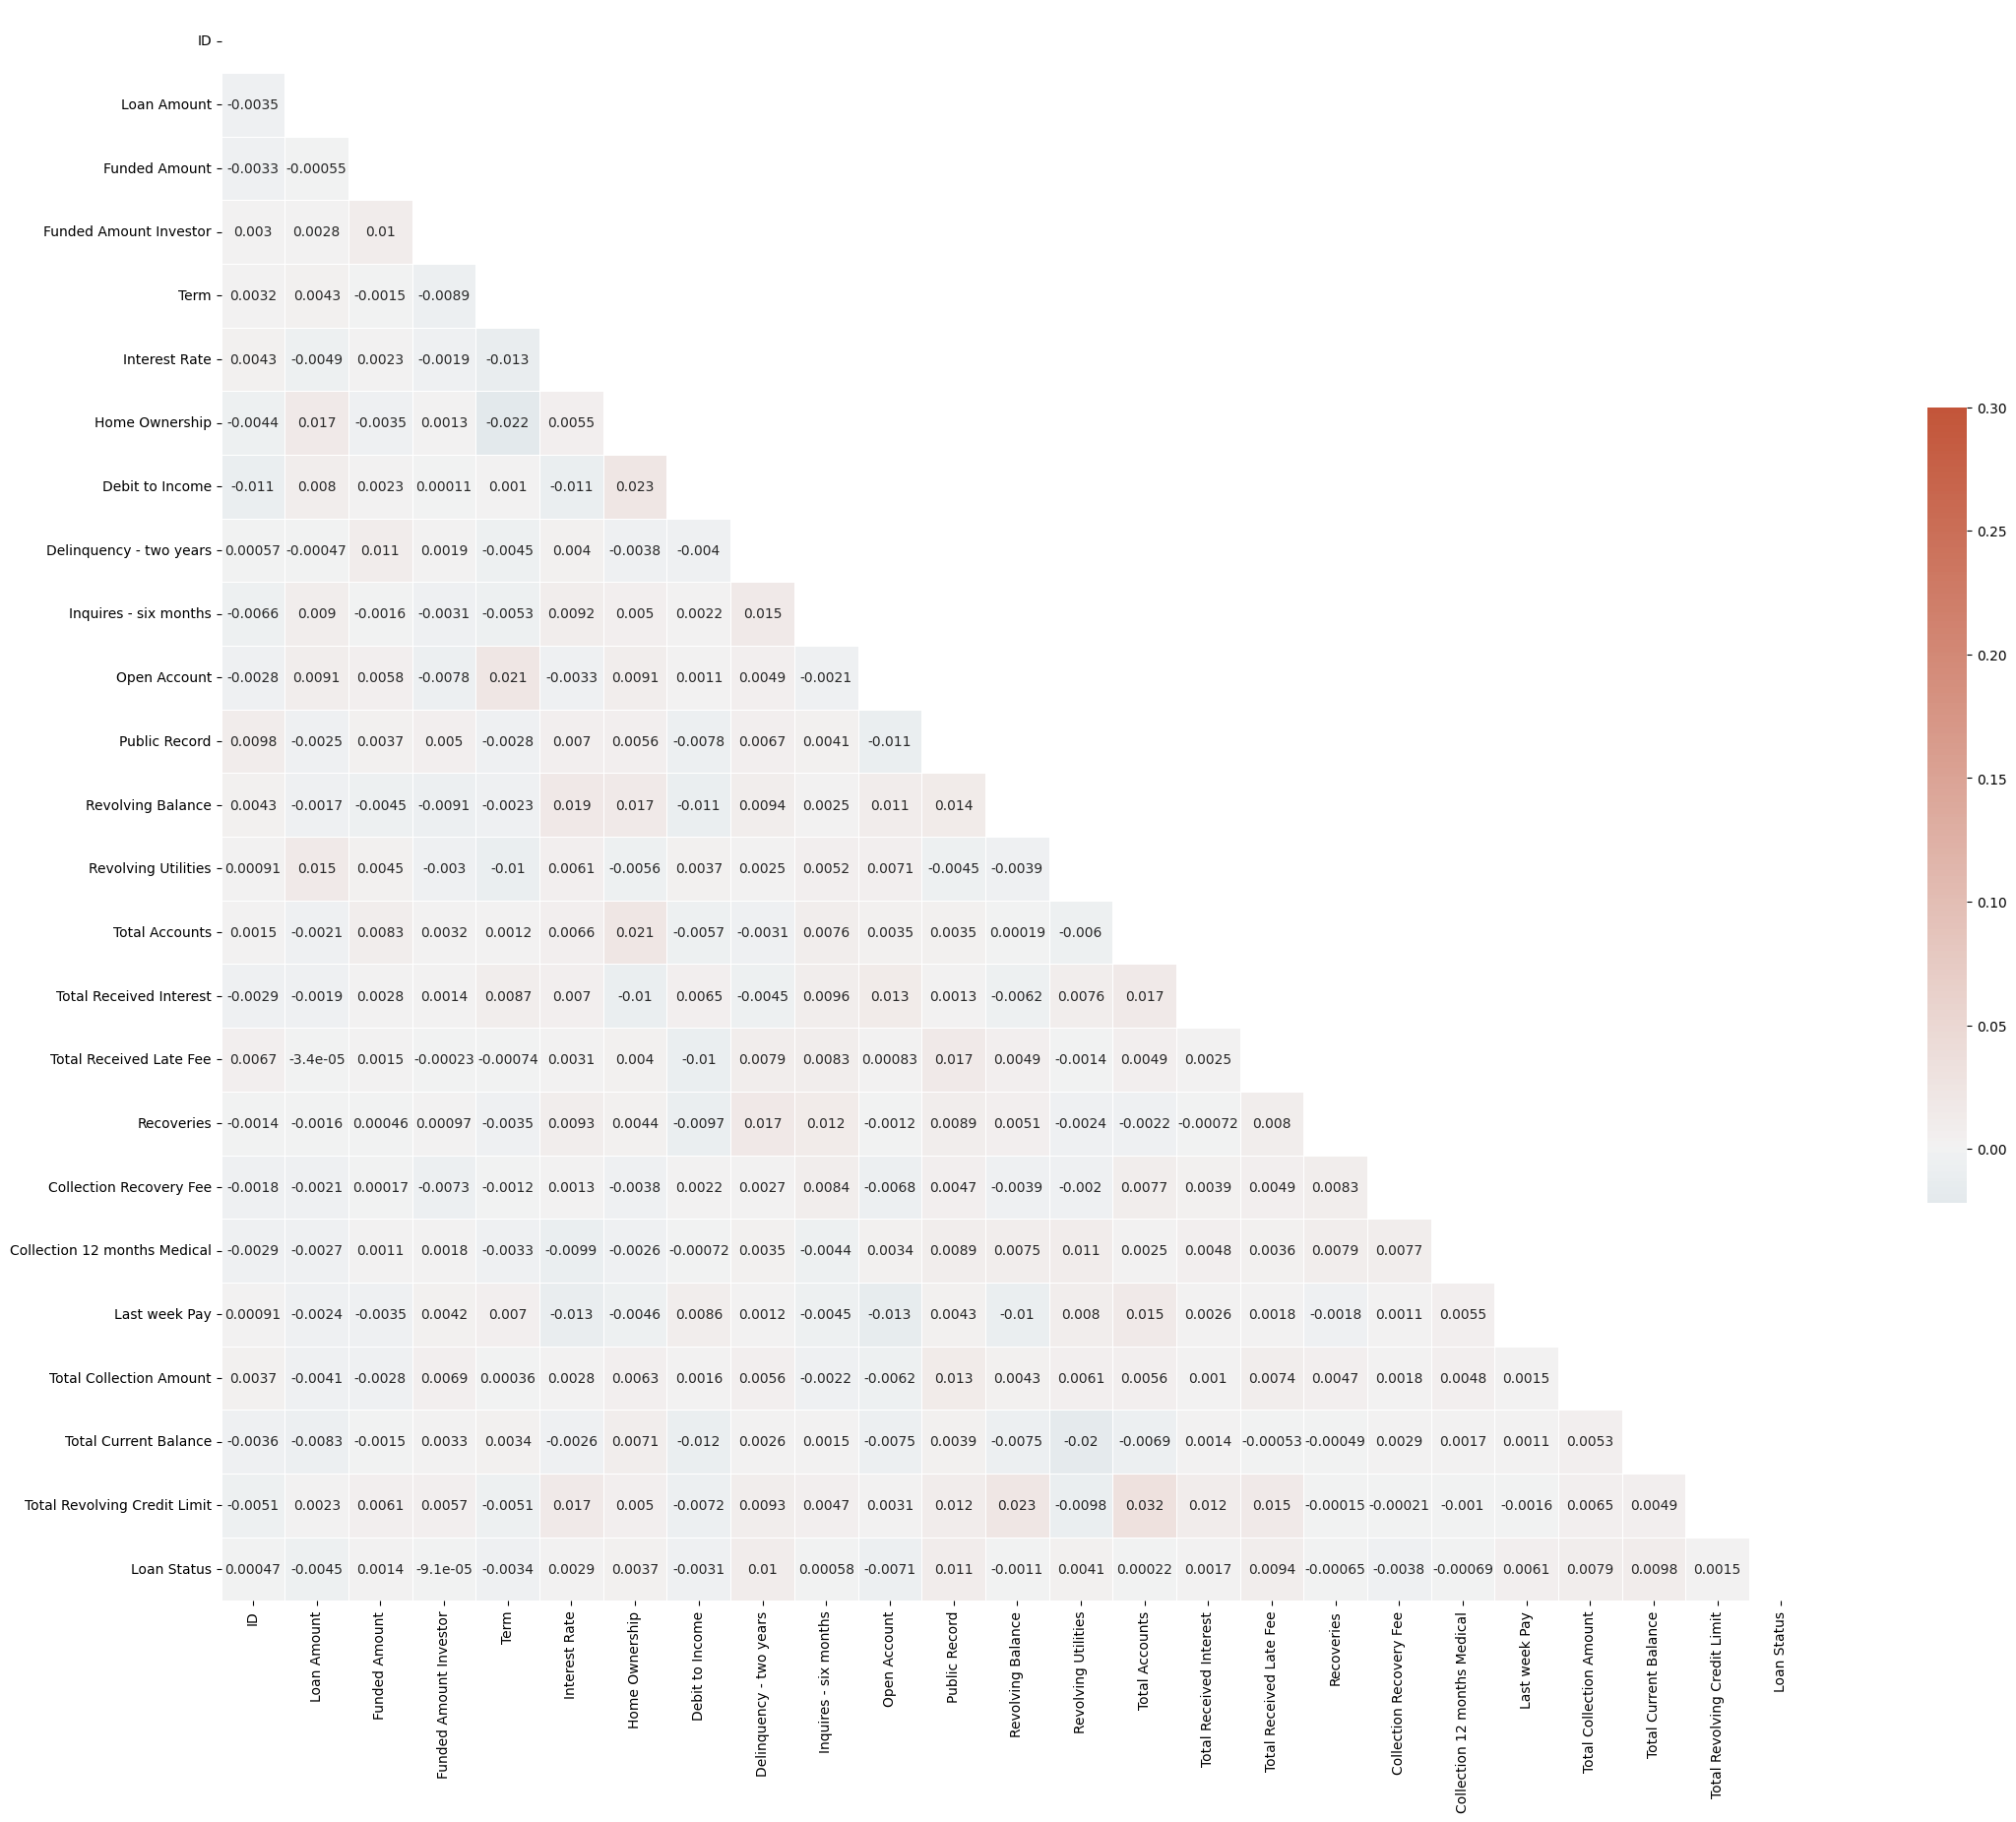

In [5]:
corr = dataset[numeric_cols].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(30, 21))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [6]:
corr = corr['Loan Status'].sort_values(ascending=False).copy()

In [17]:
corr

Loan Status                     1.000000
Public Record                   0.010590
Delinquency - two years         0.009990
Total Current Balance           0.009828
Total Received Late Fee         0.009365
Total Collection Amount         0.007892
Last week Pay                   0.006117
Revolving Utilities             0.004120
Home Ownership                  0.003716
Interest Rate                   0.002900
Total Received Interest         0.001680
Total Revolving Credit Limit    0.001454
Funded Amount                   0.001364
Inquires - six months           0.000578
ID                              0.000472
Total Accounts                  0.000222
Funded Amount Investor         -0.000091
Recoveries                     -0.000652
Collection 12 months Medical   -0.000686
Revolving Balance              -0.001073
Debit to Income                -0.003057
Term                           -0.003410
Collection Recovery Fee        -0.003828
Loan Amount                    -0.004473
Open Account    

### Conclusões da Correlação
- Tirar Accounts Delinquent
- Pegar correlações com um threshold de 0.003 ou menor que -0.003

In [7]:
numeric_cols = list(corr[(corr > 0.003)].index)[1:] + list(corr[corr < -0.003].index)

In [19]:
numeric_cols

['Public Record',
 'Delinquency - two years',
 'Total Current Balance',
 'Total Received Late Fee',
 'Total Collection Amount',
 'Last week Pay',
 'Revolving Utilities',
 'Home Ownership',
 'Debit to Income',
 'Term',
 'Collection Recovery Fee',
 'Loan Amount',
 'Open Account']

In [20]:
categorical_cols

Index(['Grade', 'Sub Grade', 'Employment Duration', 'Verification Status',
       'Loan Title', 'Initial List Status', 'Application Type'],
      dtype='object')

## Analisando Atributos Categóricos

### Grade

<Axes: xlabel='Grade', ylabel='Count'>

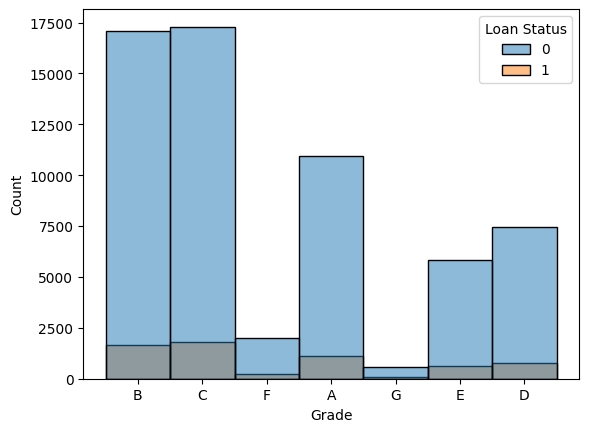

In [21]:
sns.histplot(data=dataset, x='Grade', hue='Loan Status')

In [22]:
# Distribuição de 1 (Loan Status) para as categorias de Grade
for letter in dataset['Grade'].unique():
    total = dataset['Grade'].value_counts()[letter]
    letter_1 = len(dataset[(dataset['Grade'] == letter) & (dataset['Loan Status'] == 1)])
    print(f"{letter}: {round((letter_1/total)*100,2)}%")

B: 8.72%
C: 9.39%
F: 10.37%
A: 9.12%
G: 10.63%
E: 9.59%
D: 9.64%


### Conclusão
- Quanto mais próximo da grade G, temos uma tendência de haver maior aprovação de empréstimo.

### Sub Grade

<Axes: xlabel='Sub Grade', ylabel='Count'>

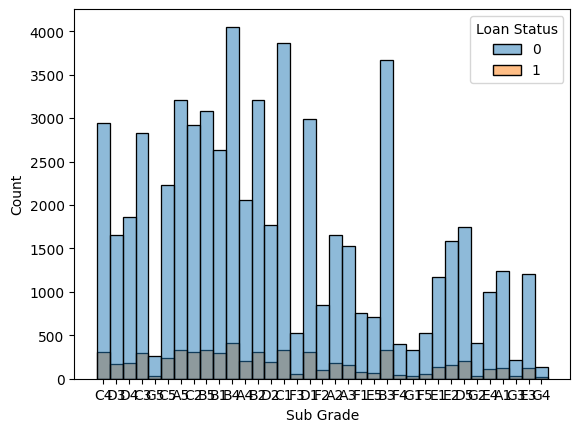

In [23]:
sns.histplot(data=dataset, x='Sub Grade', hue='Loan Status')

In [24]:
# Distribuição de 1 (Loan Status) para as categorias de Grade

letters_index = []
letters_values = []

for number, letter in enumerate(dataset['Sub Grade'].unique()):
    total = dataset['Sub Grade'].value_counts()[letter]
    letter_1 = len(dataset[(dataset['Sub Grade'] == letter) & (dataset['Loan Status'] == 1)])
    letters_index.append(letter)
    letters_values.append(round((letter_1/total)*100,2))
    #print(f"{letter}: {round((letter_1/total)*100,2)}%")

order = np.argsort(np.array(letters_values))
letters_index = np.array(letters_index)[order]
print(letters_index)


['C1' 'G2' 'E5' 'B3' 'F1' 'E2' 'B2' 'E3' 'D3' 'D4' 'F5' 'A4' 'A1' 'B4'
 'D1' 'C4' 'C2' 'A5' 'C3' 'A3' 'G1' 'B5' 'C5' 'D2' 'A2' 'G5' 'F3' 'G4'
 'F4' 'B1' 'F2' 'E1' 'E4' 'D5' 'G3']


### Conclusão
- Não há uma order específica que indique uma tendência a ter o empréstimo aprovado ou não.
- Essa coluna pode ser removida para o treinamento do modelo

### Employment Duration

In [25]:
dataset['Employment Duration'].value_counts()

Employment Duration
MORTGAGE    36351
RENT        24150
OWN          6962
Name: count, dtype: int64

<Axes: xlabel='Employment Duration', ylabel='Count'>

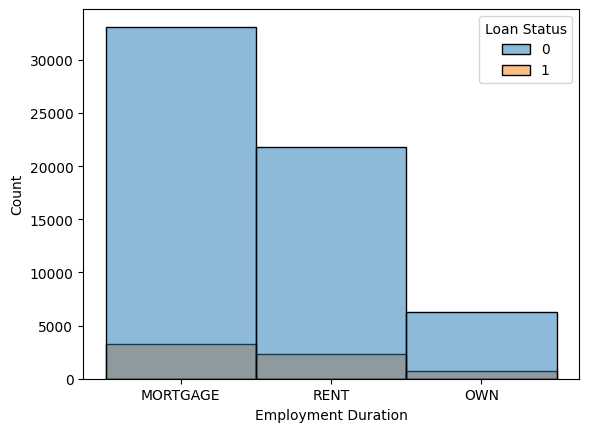

In [26]:
sns.histplot(dataset,x='Employment Duration',hue='Loan Status')

In [27]:
for number, letter in enumerate(dataset['Employment Duration'].unique()):
    total = dataset['Employment Duration'].value_counts()[letter]
    letter_1 = len(dataset[(dataset['Employment Duration'] == letter) & (dataset['Loan Status'] == 1)])
    print(f"{letter}: {round((letter_1/total)*100,2)}%")

MORTGAGE: 8.87%
RENT: 9.57%
OWN: 10.16%


### Conclusão
- Duração do emprego ser próprio, há uma tendência maior a ter o empréstimo aprovado

### Verification Status

In [28]:
dataset['Verification Status'].value_counts()

Verification Status
Source Verified    33036
Verified           18078
Not Verified       16349
Name: count, dtype: int64

<Axes: xlabel='Verification Status', ylabel='Count'>

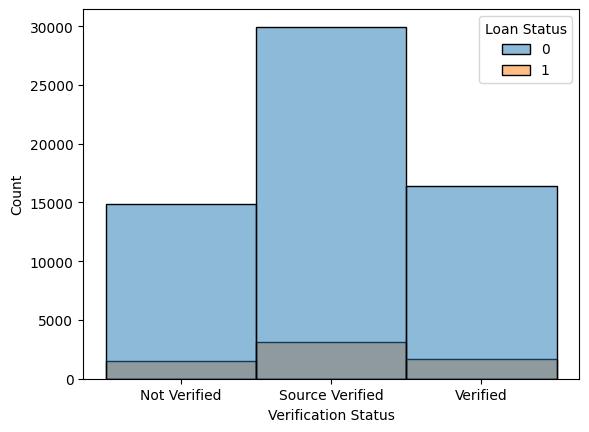

In [29]:
sns.histplot(dataset,x='Verification Status',hue='Loan Status')

In [30]:
for number, letter in enumerate(dataset['Verification Status'].unique()):
    total = dataset['Verification Status'].value_counts()[letter]
    letter_1 = len(dataset[(dataset['Verification Status'] == letter) & (dataset['Loan Status'] == 1)])
    print(f"{letter}: {round((letter_1/total)*100,2)}%")

Not Verified: 9.21%
Source Verified: 9.34%
Verified: 9.13%


### Conclusão

- Não há uma diferença significativa nos diferentes Status de Verificação para este atributo.
- Pode ser removido.

### Loan Title

In [69]:
dataset['Loan Title'].unique()

array(['Debt Consolidation', 'Debt consolidation',
       'Credit card refinancing', 'Home improvement',
       'Credit Consolidation', 'Green loan', 'Other',
       'Moving and relocation', 'Credit Cards', 'Medical expenses',
       'DEBT CONSOLIDATION', 'Home Improvement', 'Refinance',
       'credit card consolidation', 'Lending Club',
       'Debt Consolidation Loan', 'Major purchase', 'Vacation',
       'Business', 'Credit card payoff', 'Credit Card Consolidation',
       'credit card', 'Credit Card Refi', 'Personal Loan', 'CC Refi',
       'consolidate', 'Medical', 'Loan 1', 'Consolidation',
       'Card Consolidation', 'Car financing', 'debt', 'home improvement',
       'debt consolidation', 'Home buying', 'Freedom', 'Consolidate',
       'Consolidated', 'get out of debt', 'consolidation loan',
       'Dept consolidation', 'Personal loan', 'Personal', 'Debt', 'cards',
       'Cards', 'Bathroom', 'refi', 'Credit Card Loan',
       'Credit Card Debt', 'House', 'Debt Consolidation 

In [31]:
sum(dataset['Loan Title'].value_counts()[:6])/dataset.shape[0]

0.9526110608778146

Para não haver um aumento de dimensionalidade desnecessário, será removido aproximadamente 5% dos dados condicionando a escolha através do atributo Loan Title. Desta forma, serão removidas as linhas com valores de Loan Title menos frequentes (permanecerão os 6 valores mais frequentes).

In [32]:
indexes = dataset['Loan Title'].value_counts()[:6].index
indexes

Index(['Credit card refinancing', 'Debt consolidation', 'Debt Consolidation',
       'Other', 'Home improvement', 'Major purchase'],
      dtype='object', name='Loan Title')

In [33]:
#dataset = dataset[dataset['Loan Title'].isin(indexes)].copy()

In [34]:
dataset.shape

(67463, 32)

In [35]:
# Analisando as distribuições

for number, letter in enumerate(dataset['Loan Title'].unique()):
    total = dataset['Loan Title'].value_counts()[letter]
    letter_1 = len(dataset[(dataset['Loan Title'] == letter) & (dataset['Loan Status'] == 1)])
    print(f"{letter}: {round((letter_1/total)*100,2)}%")

Debt Consolidation: 8.18%
Debt consolidation: 9.05%
Credit card refinancing: 9.4%
Home improvement: 9.54%
Credit Consolidation: 12.0%
Green loan: 8.89%
Other: 9.0%
Moving and relocation: 10.19%
Credit Cards: 9.38%
Medical expenses: 7.59%
DEBT CONSOLIDATION: 8.7%
Home Improvement: 5.88%
Refinance: 13.79%
credit card consolidation: 0.0%
Lending Club: 3.12%
Debt Consolidation Loan: 7.04%
Major purchase: 9.86%
Vacation: 7.02%
Business: 7.65%
Credit card payoff: 9.38%
Credit Card Consolidation: 13.24%
credit card: 13.64%
Credit Card Refi: 16.67%
Personal Loan: 11.54%
CC Refi: 25.0%
consolidate: 4.76%
Medical: 25.0%
Loan 1: 4.76%
Consolidation: 10.31%
Card Consolidation: 6.25%
Car financing: 14.07%
debt: 9.52%
home improvement: 6.67%
debt consolidation: 13.33%
Home buying: 15.96%
Freedom: 6.67%
Consolidate: 10.91%
Consolidated: 0.0%
get out of debt: 16.67%
consolidation loan: 12.12%
Dept consolidation: 14.29%
Personal loan: 0.0%
Personal: 12.0%
Debt: 13.33%
cards: 0.0%
Cards: 22.22%
Bathroom

### Conclusão
- Permanecerá no dataset por conta do valor com menor distribuição ter uma disparidade considerável com o de maior.

### Initial List Status

In [36]:
dataset['Initial List Status'].value_counts()

Initial List Status
w    36299
f    31164
Name: count, dtype: int64

<Axes: xlabel='Initial List Status', ylabel='Count'>

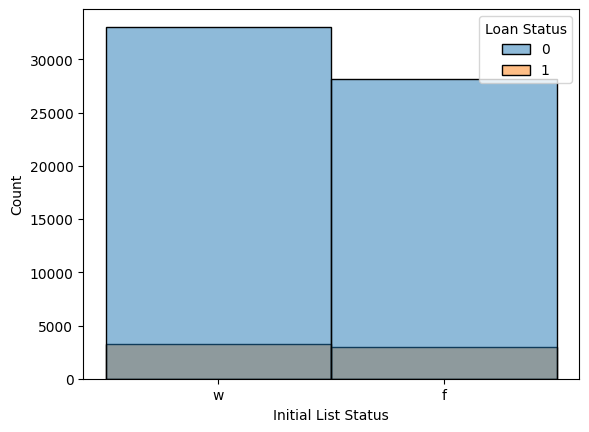

In [37]:
sns.histplot(dataset,x='Initial List Status',hue='Loan Status')

In [38]:
for number, letter in enumerate(dataset['Initial List Status'].unique()):
    total = dataset['Initial List Status'].value_counts()[letter]
    letter_1 = len(dataset[(dataset['Initial List Status'] == letter) & (dataset['Loan Status'] == 1)])
    print(f"{letter}: {round((letter_1/total)*100,2)}%")

w: 8.89%
f: 9.67%


### Conclusão:

- Mapear w para 0 e f para 1 - utilizar get_dummies

### Application Type

In [39]:
dataset['Application Type'].value_counts()

Application Type
INDIVIDUAL    67340
JOINT           123
Name: count, dtype: int64

### Conclusão
- Há uma disparidade de proporção entre os valores muito grande, por isso foir adotado que retira-se esse atributo do dataset de treino.

## Remoção das Colunas Após Análise dos Atributos Categóricos

In [8]:
categorical_cols = categorical_cols.drop(['Sub Grade','Verification Status','Application Type'])

In [41]:
categorical_cols

Index(['Grade', 'Employment Duration', 'Loan Title', 'Initial List Status'], dtype='object')

## Pegando os Targets

In [42]:
targets = dataset['Loan Status'].copy()

## Feature Engineering

In [43]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

## Scaling

In [44]:
scaler = MinMaxScaler().fit(dataset[numeric_cols])
dataset[numeric_cols] = scaler.transform(dataset[numeric_cols])

In [45]:
dataset.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000
mean,2.562761e+07,0.465924,15770.599114,14621.799323,0.964079,11.846258,0.168291,0.580778,0.040891,0.145754,...,2068.992542,0.026842,59.691578,0.006744,0.021301,0.442008,0.008859,0.135076,23123.005544,0.092510
std,2.109155e+07,0.246215,8150.992662,6785.345170,0.144671,3.718629,0.114874,0.216966,0.100111,0.473291,...,2221.918745,0.123053,357.026346,0.020918,0.144385,0.269043,0.045334,0.118146,20916.699999,0.289747
min,1.297933e+06,0.000000,1014.000000,1114.590204,0.000000,5.320006,0.000000,0.000000,0.000000,0.000000,...,4.736746,0.000000,0.000036,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000
25%,6.570288e+06,0.264756,9266.500000,9831.684984,0.956522,9.297147,0.094687,0.412817,0.000000,0.000000,...,570.903814,0.000495,1.629818,0.002854,0.000000,0.217391,0.001401,0.042286,8155.500000,0.000000
50%,1.791565e+07,0.443094,13042.000000,12793.682170,1.000000,11.377696,0.139704,0.564282,0.000000,0.000000,...,1330.842771,0.001018,3.344524,0.004676,0.000000,0.422360,0.002132,0.100062,16733.000000,0.000000
75%,4.271521e+07,0.620608,21793.000000,17807.594120,1.000000,14.193533,0.204215,0.754035,0.000000,0.000000,...,2656.956837,0.001687,5.453727,0.006417,0.000000,0.652174,0.002741,0.193541,32146.500000,0.000000
max,7.224578e+07,1.000000,34999.000000,34999.746430,1.000000,27.182348,1.000000,1.000000,1.000000,5.000000,...,14301.368310,1.000000,4354.467419,1.000000,1.000000,1.000000,1.000000,1.000000,201169.000000,1.000000


## Encoder

In [46]:
encoder = OneHotEncoder(sparse_output = False, handle_unknown='ignore').fit(dataset[categorical_cols].copy())
encoder_cols = list(encoder.get_feature_names_out(categorical_cols))
dataset[encoder_cols] = encoder.transform(dataset[categorical_cols])

C:\Users\pedro\AppData\Local\Temp\ipykernel_11612\711074544.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[encoder_cols] = encoder.transform(dataset[categorical_cols])
C:\Users\pedro\AppData\Local\Temp\ipykernel_11612\711074544.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[encoder_cols] = encoder.transform(dataset[categorical_cols])
C:\Users\pedro\AppData\Local\Temp\ipykernel_11612\711074544.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

In [47]:
dataset[encoder_cols]

,Grade_A,Grade_B,Grade_C,Grade_D,Grade_E,Grade_F,Grade_G,Employment Duration_MORTGAGE,Employment Duration_OWN,Employment Duration_RENT,...,Loan Title_home improvement,Loan Title_loan1,Loan Title_pay off bills,Loan Title_payoff,Loan Title_personal,Loan Title_refi,Loan Title_relief,Loan Title_vacation,Initial List Status_f,Initial List Status_w
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
67459,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
67460,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
67461,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Separando Dados para Treino e Validação

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    dataset[list(numeric_cols) + encoder_cols], targets, test_size=0.25, random_state=42)

##

## Random Forest

In [146]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
model_rf = RandomForestClassifier(n_jobs=-1, random_state=42)

In [148]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [149]:
model_rf.score(X_train, y_train)

0.9999011799118525

In [150]:
model_rf.score(X_val, y_val)

0.9089292066880114

## Lidando com Imbalanced Classes

- Resampling: Over-sampling ou Under-sampling:
    - Melhoras: Over-sampling modificando ligeiramente as novas tuplas, under-sampling depois de clusterizar os dados.

- Biblioteca para lidar com isso: import imblearn
- **oversampling**: RandomOverSampler, Smote
- **undersampling**: RandomUnderSampler, TomekLinks, NearMiss

## Relizando o Balanceamento de Classes e Re-treinando o Modelo

### Utilizando Smote

In [54]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train2, y_train2 = smote.fit_resample(X_train, y_train)
X_val2, y_val2 = smote.fit_resample(X_val, y_val)


In [55]:
y_val2.value_counts()

Loan Status
0    15330
1    15330
Name: count, dtype: int64

In [56]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_jobs=-1, random_state=42)

model_rf.fit(X_train2, y_train2)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [57]:
model_rf.score(X_train2, y_train2)

1.0

In [58]:
model_rf.score(X_val2, y_val2)

0.803750815394651

### Near Miss

In [120]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

X_train2, y_train2 = nm.fit_resample(X_train, y_train)
X_val2, y_val2 = nm.fit_resample(X_val, y_val)

In [121]:
y_val2.value_counts()

Loan Status
0    1536
1    1536
Name: count, dtype: int64

In [122]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_jobs=-1, random_state=42)

model_rf.fit(X_train2, y_train2)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [123]:
model_rf.score(X_train2, y_train2)

1.0

In [124]:
model_rf.score(X_val2, y_val2)

0.8056640625

### Tomek Links

In [64]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='not majority')

X_train2, y_train2 = tl.fit_resample(X_train, y_train)
X_val2, y_val2 = tl.fit_resample(X_val, y_val)

In [65]:
y_train2.value_counts()

Loan Status
0    45892
1     2847
Name: count, dtype: int64

In [87]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_jobs=-1, random_state=42)

model_rf.fit(X_train2, y_train2)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [88]:
model_rf.score(X_train2, y_train2)

1.0

Foi decidido que não vai ser usando o balanceamento das classes, pois a classe 0 representa todo o arquivo submission.csv, mostrando que há uma majoritária presença desta classe naturalmente, e balancear as classes iria contra essa naturalidade.

In [89]:
model_rf.score(X_val2, y_val2)

0.8056640625

## Rodando os Modelos no dataset de Teste

In [99]:
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [117]:
def preprocess(dtset, colsToDrop):
  global numeric_cols, encoder_cols
  # Dropa as colunas que forem passadas por parametro automaticamente
  dtset = dtset.drop(columns=colsToDrop).copy()
  # Dropa as linhas de Loan Title que nao queremos
  #indexes = dtset['Loan Title'].value_counts()[:6].index
  #dtset = dtset[dtset['Loan Title'].isin(indexes)].copy()
  # Seleciona as colunas numericas e categoricas
  numeric_cols = dtset.select_dtypes(include='number').columns
  categorical_cols = dtset.select_dtypes(include='object').columns
  # Realizacao do scaling
  scaler = MinMaxScaler().fit(dtset[numeric_cols])
  dtset[numeric_cols] = scaler.transform(dtset[numeric_cols])
  # Realizacao do encoding
  encoder = OneHotEncoder(sparse_output = False, handle_unknown='ignore').fit(dtset[categorical_cols].copy())
  encoder_cols = list(encoder.get_feature_names_out(categorical_cols))
  dtset[encoder_cols] = encoder.transform(dtset[categorical_cols].copy())
  return dtset[list(numeric_cols) + encoder_cols]

In [118]:
data_test = pd.read_csv('bank-loan-defaulter-prediction-hackathon/test.csv')

In [119]:
cols_to_drop = ['Payment Plan','Accounts Delinquent','Batch Enrolled', 'Sub Grade', 'Verification Status',
 'Application Type', 'Interest Rate', 'Total Received Interest', 'Total Revolving Credit Limit', 
 'Funded Amount', 'ID', 'Inquires - six months', 'Total Accounts', 'Funded Amount Investor', 
 'Recoveries', 'Collection 12 months Medical', 'Revolving Balance', 'Loan Status']

data_test = preprocess(data_test, cols_to_drop)

C:\Users\pedro\AppData\Local\Temp\ipykernel_8812\2012373384.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dtset[encoder_cols] = encoder.transform(dtset[categorical_cols].copy())
C:\Users\pedro\AppData\Local\Temp\ipykernel_8812\2012373384.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dtset[encoder_cols] = encoder.transform(dtset[categorical_cols].copy())
C:\Users\pedro\AppData\Local\Temp\ipykernel_8812\2012373384.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

In [120]:
dataset = pd.read_csv('bank-loan-defaulter-prediction-hackathon/train.csv')
targets = dataset['Loan Status'].copy()

In [121]:
cols_to_drop = ['Payment Plan','Accounts Delinquent','Batch Enrolled', 'Sub Grade', 'Verification Status',
 'Application Type', 'Interest Rate', 'Total Received Interest', 'Total Revolving Credit Limit', 
 'Funded Amount', 'ID', 'Inquires - six months', 'Total Accounts', 'Funded Amount Investor', 
 'Recoveries', 'Collection 12 months Medical', 'Revolving Balance', 'Loan Status']

dataset = preprocess(dataset, cols_to_drop)

C:\Users\pedro\AppData\Local\Temp\ipykernel_8812\2012373384.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dtset[encoder_cols] = encoder.transform(dtset[categorical_cols].copy())
C:\Users\pedro\AppData\Local\Temp\ipykernel_8812\2012373384.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dtset[encoder_cols] = encoder.transform(dtset[categorical_cols].copy())
C:\Users\pedro\AppData\Local\Temp\ipykernel_8812\2012373384.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

In [ ]:
X_train.columns

In [122]:
results = pd.read_csv('bank-loan-defaulter-prediction-hackathon/submission.csv')

In [29]:
results

,Loan Status
0,0
1,0
2,0
3,0
4,0
...,...
28908,0
28909,0
28910,0
28911,0


In [123]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    dataset[list(numeric_cols) + encoder_cols], targets, test_size=0.25, random_state=42)

## Score para Diferentes Modelos

In [124]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
lr_score = model_lr.score(data_test, results)
lr_score

1.0

In [125]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_jobs=-1, random_state=42)
model_rf.fit(X_train, y_train)
rf_score = model_rf.score(data_test,results)
rf_score

0.9999654134818248

In [126]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
dt_score = model_dt.score(data_test,results)
dt_score

0.7269394390066752

In [128]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
nb_score = model_nb.score(data_test, results)
nb_score

0.01141355099782105

In [130]:
models = pd.DataFrame({
    'Model': ['Logistic Regression',
              'Decision Tree', 
              'Random Forest', 
              'Naive Bayes',],
    'Score': [lr_score, rf_score, dt_score, nb_score],})

In [132]:
models.sort_values(by = 'Score', ascending = True).style.background_gradient(cmap = "Pastel2_r")

,Model,Score
3,Naive Bayes,0.011414
2,Random Forest,0.726939
1,Decision Tree,0.999965
0,Logistic Regression,1.000000
